### AutoEDA Tool

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import pandas.api.types as typeop

In [18]:
df1 = pd.read_csv('Datasets/vehicleInsurance.csv')
df2 = pd.read_csv('Datasets/pimaDiabetes.csv')
df3 = pd.read_excel('Datasets/superstore-subset.xlsx')
df4 = pd.read_csv('Datasets/housePrices.csv')
df5 = pd.read_csv('Datasets/attrition.csv')

#### Variable Identification Function
- Helper Function used across all 4 functions

In [19]:
def identifyVariables(dataset):
    columns = list(dataset.columns)
    cat_vars = []
    num_vars = []
    
    # Variable Identification
    print("-----Variable Identification-----")
    for i in columns:
        if(typeop.is_string_dtype(dataset[i]) or (dataset[i].nunique() <= 5)):
            cat_vars.append(i)
        elif(typeop.is_numeric_dtype(dataset[i])):
            num_vars.append(i)
    print("\nCategorical Variables: \n",cat_vars)
    print("\nNumerical Variables: \n",num_vars)
    
    # Ask User if he wants to remove any variables from analysis :
    switch = input("\nDo you want to remove any variables from the analysis eg.Text or Employee ID or DateTime type ? (Y/N) : ").upper()
    while(switch =='Y'):
        varToPop = list(str(x) for x in input("Enter list of variables separated by \",\": ").split(','))
        wrongVar = []
        for i in varToPop:
            if(i in cat_vars):
                cat_vars.pop(cat_vars.index(i))
            elif(i in num_vars):
                num_vars.pop(num_vars.index(i))
            else:
                wrongVar.append(i)
        if(len(wrongVar) > 0):
            print("Following elements have been wrongly entered: ",wrongVar)
            print("\nPlease Try Again!!!")
        else:
            print("\n{} elements have been removed!!".format(len(varToPop)))
            switch ='N'
        
    
    # Ask User if he wants to switch lists for any variable :
    switch = input("\nDo you want to change the categories of any Variable? (Y/N) :  ").upper()
    while(switch =='Y'):
        varToswitch = list(str(x) for x in input("Enter list of variables separated by \",\": ").split(','))
        wrongVar = []
        for i in varToswitch:
            if(i in cat_vars):
                num_vars.append(i)
                cat_vars.pop(cat_vars.index(i))
            elif(i in num_vars):
                cat_vars.append(i)
                num_vars.pop(num_vars.index(i))
            else:
                wrongVar.append(i)
        if(len(wrongVar) > 0):
            print("Following elements have been wrongly entered: ",wrongVar)
            print("\nPlease Try Again!!!")
        else:
            print("\n{} elements have been switched!!".format(len(varToswitch)))
            switch ='N'
            
        print("-----Updated List of Variables-----")
        print("\nCategorical Variables: \n",cat_vars)
        print("\nNumerical Variables: \n",num_vars)
        
    return num_vars,cat_vars

#### Histograms for Numeric Data
- Input : dataset
- Output : Histograms of all numerical data 
and save it in .png

In [ ]:
def Histograms(dataset,name):
    
    # identifyVariables function will return the list of numerical and categorical variables
    num_vars,cat_vars = identifyVariables(dataset)
    
    # by default makes a directory in current working directory where all graphs will be saved
    graph_location = os.getcwd() + "/"+ name + "/Univariate/Numerical/"
    os.makedirs(graph_location)
    
    # Loop across all the numerical variables to plot the histogram and save it 
    print("\n-----Histograms for Numerical Variables-----")

    for i in num_vars:
        fig = plt.figure(figsize=(10,10))
        ax = sns.distplot(dataset[i],kde=False,norm_hist=False)
        ax.set(title= "Dataset : {} , Histogram: {}".format(name,i),xlabel= i,ylabel= "Count")
        plt.savefig(graph_location + "{}_Histogram.png".format(i),bbox_inches='tight', dpi=300)
        plt.close(fig)
        
    print("\nPlotted and Saved Histograms of {} Numerical Variables".format(len(num_vars)))
    return

In [ ]:
df1.columns

In [ ]:
Histograms(df1,"Vehicle Insurance")

#### Histograms + BoxPlot for Numeric Data and Bar Plot for Categorical Data
- Input : dataset
- Output : Histograms and Boxplots for numerical data and Bar plots of categorical data and save it in .png

In [ ]:
def Graphs(dataset,name):
    
    num_vars,cat_vars = identifyVariables(dataset)

    # by default makes a directory in current working directory where all graphs will be saved
    numerical_location = os.getcwd() + "/" + name + "/Univariate/Numerical/"
    categorical_location = os.getcwd() + "/" + name + "/Univariate/Categorical/"
    os.makedirs(numerical_location)
    os.makedirs(categorical_location)
    
    # Loop across all the numerical variables to plot the Histogram and Boxplot and save it 
    print("\n-----Histograms and Box plots for Numerical Variables-----")

    for i in num_vars:
        fig,ax = plt.subplots(1,2,figsize=(20,10))
        sns.distplot(dataset[i],kde=False,norm_hist=False,ax=ax[0])
        ax[0].set(title= "Dataset : {} , Histogram: {}".format(name,i),xlabel= i,ylabel= "Count")
        sns.boxplot(dataset[i],ax=ax[1])
        ax[1].set(title= "Dataset : {} , Boxplot : {}".format(name,i),xlabel= i)
        plt.savefig((numerical_location+"{}_BoxAndHist.png").format(i), bbox_inches = 'tight',dpi=300)
        plt.close(fig)
        
    print("\nPlotted and Saved Histograms + Box Plots of {} Numerical Variables".format(len(num_vars)))
    
    # Loop across all the Categorical variables to plot the Countplot and save it 
    print("\n-----Count Plots for Categorical Variables-----")

    for i in cat_vars:
        fig = plt.figure(figsize=(10,10))
        ax = sns.countplot(data=dataset,x=i)
        ax.set(title= "Dataset : {} , Countplot : {}".format(name,i),xlabel= i,ylabel= "Count")
        plt.savefig((categorical_location+"{}_Countplot.png").format(i),bbox_inches = 'tight',dpi=300)
        plt.close(fig)
        
    print("\nPlotted and Saved Countplots of {} Categorical Variables".format(len(cat_vars)))
    return

In [ ]:
df2.columns

In [ ]:
Graphs(df2,"Diabetes")

#### Graphs  to be plotted for User Specified variables
- Input : dataset, list of variables to plot 
- Output : Based on numeric or categorical plot appropriate graphs 
and save it in .png format

In [ ]:
def specificGraphs(dataset,name,cols = []):
    
    if len(cols) == 0 :
        cols = [x for x in range(len(dataset.columns))]
    num_vars,cat_vars = identifyVariables(dataset.iloc[:,cols])
    
    # by default makes a directory in current working directory where all graphs will be saved
    numerical_location = os.getcwd() + "/" + name + "/Univariate/Numerical/"
    categorical_location = os.getcwd() + "/" + name + "/Univariate/Categorical/"
    os.makedirs(numerical_location)
    os.makedirs(categorical_location)
    
    # Loop across all the numerical variables to plot the Histogram and Boxplot and save it 
    print("\n-----Histograms and Box plots for Numerical Variables-----")

    for i in num_vars:
        fig,ax = plt.subplots(1,2,figsize=(20,10))
        sns.distplot(dataset[i],kde=False,norm_hist=False,ax=ax[0])
        ax[0].set(title= "Dataset : {} , Histogram: {}".format(name,i),xlabel= i,ylabel= "Count")
        sns.boxplot(dataset[i],ax=ax[1])
        ax[1].set(title= "Dataset : {} , Boxplot : {}".format(name,i),xlabel= i)
        plt.savefig(numerical_location+"{}_BoxAndHist.png".format(i), bbox_inches = 'tight',dpi=300)
        plt.close(fig)
        
    print("\nPlotted and Saved Histograms + Box Plots of {} Numerical Variables".format(len(num_vars)))
    
    # Loop across all the Categorical variables to plot the Countplot and save it 
    print("\n-----Count Plots for Categorical Variables-----")

    for i in cat_vars:
        fig = plt.figure(figsize=(10,10))
        ax = sns.countplot(data=dataset,x=i)
        ax.set(title= "Dataset : {} , Countplot : {}".format(name,i),xlabel= i,ylabel= "Count")
        plt.savefig(categorical_location+"{}_Countplot.png".format(i),bbox_inches = 'tight',dpi=300)
        plt.close(fig)
        
    print("\nPlotted and Saved Countplots of {} Categorical Variables".format(len(cat_vars)))
    return

In [ ]:
list(df3.columns).index("Discount")

In [ ]:
specificGraphs(df3,"superstore",[1,2,7,8,11,20,22])

#### Graphs  to be plotted for User Specified variables and saved in User Specified Location
- Input: dataset, list of variables,directory
- Output: Save all the graphs in the user specified directory

In [ ]:
def specificGraphsInDir(dataset,name,cols=[],location= os.getcwd()):

    if len(cols) == 0 :
        cols = [x for x in range(len(dataset.columns))]
    
    num_vars,cat_vars = identifyVariables(dataset.iloc[:,cols])
    
    numerical_location = location + "/" + name + "/Univariate/Numerical/"
    categorical_location = location + "/" + name + "/Univariate/Categorical/"
    os.makedirs(numerical_location)
    os.makedirs(categorical_location)
    
    # Loop across all the numerical variables to plot the Histogram and Boxplot and save it 
    print("\n-----Histograms and Box plots for Numerical Variables-----")

    for i in num_vars:
        fig,ax = plt.subplots(1,2,figsize=(20,10))
        sns.distplot(dataset[i].dropna(),kde=False,norm_hist=False,ax=ax[0])
        ax[0].set(title= "Dataset : {} , Histogram: {}".format(name,i),xlabel= i,ylabel= "Count")
        sns.boxplot(dataset[i].dropna(),ax=ax[1])
        ax[1].set(title= "Dataset : {} , Boxplot : {}".format(name,i),xlabel= i)
        plt.savefig((numerical_location + "{}_BoxAndHist.png").format(i), bbox_inches = 'tight',dpi=300)
        plt.close(fig)
        
    print("\nPlotted and Saved Histograms + Box Plots of {} Numerical Variables".format(len(num_vars)))
    
    # Loop across all the Categorical variables to plot the Countplot and save it 
    print("\n-----Count Plots for Categorical Variables-----")

    for i in cat_vars:
        fig = plt.figure(figsize=(10,10))
        ax = sns.countplot(data=dataset,x=i)
        ax.set(title= "Dataset : {} , Countplot : {}".format(name,i),xlabel= i,ylabel= "Count")
        plt.savefig((categorical_location + "{}_Countplot.png").format(i),bbox_inches = 'tight',dpi=300)
        plt.close(fig)
        
    print("\nPlotted and Saved Countplots of {} Categorical Variables".format(len(cat_vars)))
    return

In [22]:
len(df4.columns)

81

In [23]:
specificGraphsInDir(df4,"House Prices",[0,3,4,8,12,16,17,71,80],"C:/Anirudha")

-----Variable Identification-----

Categorical Variables: 
 ['LandContour', 'Neighborhood', 'HouseStyle']

Numerical Variables: 
 ['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'PoolArea', 'SalePrice']

Do you want to remove any variables from the analysis eg.Text or Employee ID or DateTime type ? (Y/N) : Y
Enter list of variables separated by ",": Id

1 elements have been removed!!

Do you want to change the categories of any Variable? (Y/N) :  Y
Enter list of variables separated by ",": OverallQual

1 elements have been switched!!
-----Updated List of Variables-----

Categorical Variables: 
 ['LandContour', 'Neighborhood', 'HouseStyle', 'OverallQual']

Numerical Variables: 
 ['LotFrontage', 'LotArea', 'PoolArea', 'SalePrice']

-----Histograms and Box plots for Numerical Variables-----

Plotted and Saved Histograms + Box Plots of 4 Numerical Variables

-----Count Plots for Categorical Variables-----

Plotted and Saved Countplots of 4 Categorical Variables


#### Graphs for Bivariate Analysis
- Input: dataset,list of variables,directory location
- Output: Different types of graphs for different combination of variables stored in different folders in given directory

In [33]:
def bivariateAnalysis(dataset,name,cols=[],location= os.getcwd()):
    
    if len(cols) == 0 :
        cols = [x for x in range(len(dataset.columns))]
    num_vars,cat_vars = identifyVariables(dataset.iloc[:,cols])
    
    numvsnum_location = location + "/" + name + "/Bivariate/NumVSNum/"
    numvscat_location = location + "/" + name + "/Bivariate/NumVSCat/"
    catvscat_location = location + "/" + name + "/Bivariate/CatVSCat/"
    os.makedirs(numvsnum_location)
    os.makedirs(numvscat_location)
    os.makedirs(catvscat_location)
    
    # Loop across all the numerical variables to plot the Histogram and Boxplot and save it 
    print("\n-----Join Plots for Numerical Vs Numerical Analysis-----")
    count=0
    for i in num_vars:
        for j in num_vars:            
            if(i!=j and num_vars.index(i)<num_vars.index(j)):
                fig = plt.figure(figsize=(10,10))
                ax = sns.jointplot(data=dataset,x=i,y=j,cmap="Winter")
                plt.savefig((numvsnum_location+"{}vs{}_JointPlot.png").format(i,j),bbox_inches='tight', dpi=300)
                plt.close(fig)
                count=count+1
    print("\nPlotted and Saved {} JointPlots".format(count))
    
    print("\n-----Violin Plots for Numerical Vs Categorical Analysis-----")
    count=0
    for i in cat_vars:
        for j in num_vars:
            fig = plt.figure(figsize=(10,10))
            ax = sns.violinplot(data=dataset,x=i,y=j)
            ax.set(title= "Dataset : {} , Violinplot: {} vs {}".format(name,i,j),xlabel= i,ylabel= j)
            plt.savefig((numvscat_location+"{}vs{}_ViolinPlot.png").format(i,j),bbox_inches='tight', dpi=300)
            plt.close(fig)
            count=count+1
    print("\nPlotted and Saved {} ViolinPLot".format(count))
    
    print("\n-----HeatMaps for Categorical Vs Categorical Analysis-----")
    count=0
    for i in cat_vars:
        for j in cat_vars:
            if(i!=j and cat_vars.index(i)<cat_vars.index(j)):
                myTable = pd.crosstab(index=dataset[i],columns = dataset[j],normalize='index')
                fig = plt.figure(figsize=(10,10))
                ax = sns.heatmap(data=myTable*100,cmap="Greens",annot= True)
                bottom, top = ax.get_ylim()
                ax.set_ylim(bottom + 0.5, top - 0.5)
                ax.set(title= "Dataset : {} , HeatMaps : {} vs {}".format(name,i,j),xlabel= j,ylabel= i)
                plt.savefig((catvscat_location+"{}vs{}_HeatMap.png").format(i,j),bbox_inches='tight', dpi=300)
                plt.close(fig)
                count=count+1
    print("\nPlotted and Saved {} HeatMaps".format(count))
    return

In [31]:
len(df5.columns)

21

-----Variable Identification-----

Categorical Variables: 
 ['Attrition', 'BusinessTravel', 'Department', 'Gender', 'OverTime']

Numerical Variables: 
 ['MonthlyIncome', 'YearsAtCompany', 'DistanceFromHome']

Do you want to remove any variables from the analysis eg.Text or Employee ID or DateTime type ? (Y/N) : N

Do you want to change the categories of any Variable? (Y/N) :  N

-----Join Plots for Numerical Vs Numerical Analysis-----

Plotted and Saved 3 JointPlots

-----Violin Plots for Numerical Vs Categorical Analysis-----

Plotted and Saved 15 ViolinPLot

-----HeatMaps for Categorical Vs Categorical Analysis-----

Plotted and Saved 10 HeatMaps


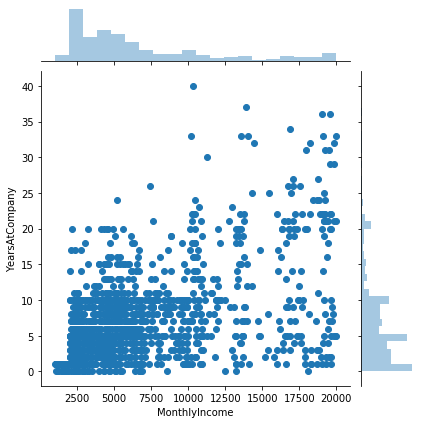

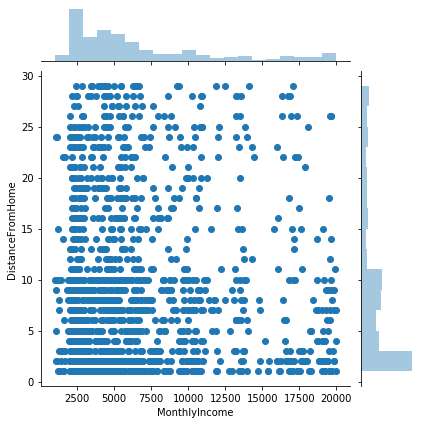

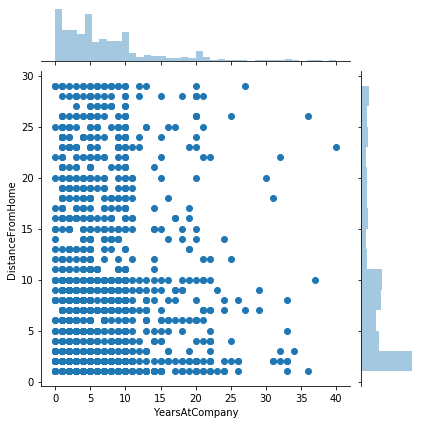

In [34]:
bivariateAnalysis(df5,"Attrition",[2,3,4,7,12,13,16,20],"C:/Anirudha")